In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
import matplotlib.dates as dates
import seaborn as sns
from matplotlib.dates import DateFormatter

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from tslearn.clustering import TimeSeriesKMeans 
import scipy.cluster.hierarchy as hac
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler
from scipy.cluster.hierarchy import fcluster
import matplotlib.dates as mdates

In [2]:
load = pd.read_csv("10yearload.csv")
load.index = pd.to_datetime(load.date,infer_datetime_format=True)
load = load.drop(columns=['date'])
load["concentration"] = load.loadkg/load.Discharge
load.head()

,Tpconc,Discharge,loadkg,concentration
date,,,,
2008-01-01,0.0,195.385920,0.000000,0.000000
2008-01-02,0.3,167.635456,4384.343679,26.154036
2008-01-03,0.3,137.902816,3609.376190,26.173332
2008-01-04,0.3,119.213728,3120.050119,26.171903
2008-01-05,0.3,95.144448,2489.972350,26.170443


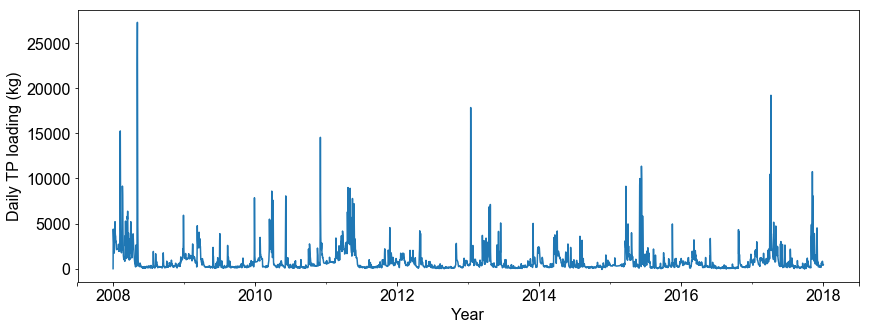

In [4]:
### 10 year TP loading (kg)
import matplotlib as mpl
matplotlib.rcParams.update({'font.size': 16})
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

mpl.rc("figure", figsize=(14,5))
ax = load.loadkg.plot(figsize=(14,5))

ax.set_ylabel("Daily TP loading (kg)")
ax.set_xlabel("Year")

# Format the x axis
#ax.xaxis.set_major_locator(dates.YearLocator(5, month=1))
#ax.xaxis.set_major_formatter(DateFormatter("%Y"))
plt.savefig("SWAT_10year_Pload.tif")


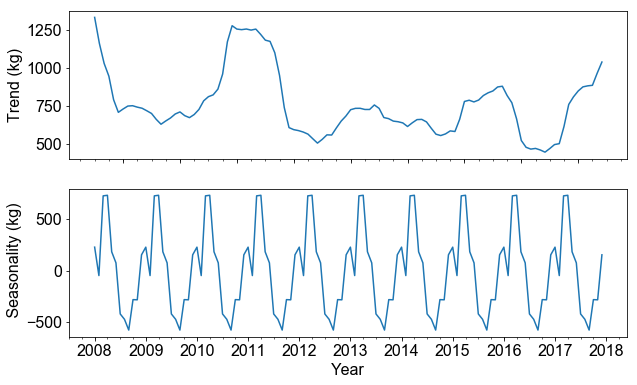

In [4]:
load_longmonthly = load.loadkg.resample("M").mean()
## TP loading trend
## 08, 17, 11 year have more high peaks

plt.figure(figsize=(10,6))

result = seasonal_decompose(load_longmonthly)
plt.subplot(2,1,1)
result.trend.plot()
plt.ylabel("Trend (kg)")
plt.tick_params(
axis='x',          # changes apply to the x-axis
which='both',      # both major and minor ticks are affected
#bottom=False,      # ticks along the bottom edge are off
top=False,         # ticks along the top edge are off
labelbottom=False)
plt.xlabel('')

plt.subplot(2,1,2)
result.seasonal.plot()
#result.seasonal.plot(legend=True)
plt.ylabel(" Seasonality (kg)")
plt.xlabel("Year")
plt.savefig("10 years decomposition.tif")

Text(0.5,0,'Year')

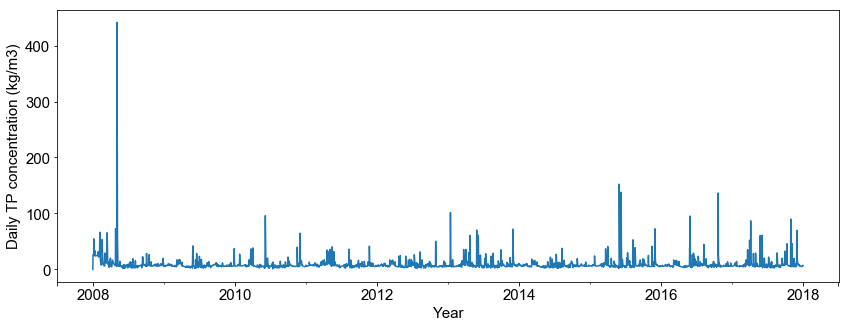

In [5]:
### 10 year Daily TP concentration (kg/m3)
import matplotlib as mpl
matplotlib.rcParams.update({'font.size': 15})
mpl.rc("figure", figsize=(14,5))
ax = load.concentration.plot(figsize=(14,5))

ax.set_ylabel("Daily TP concentration (kg/m3)")
ax.set_xlabel("Year")

# Format the x axis
#ax.xaxis.set_major_locator(dates.YearLocator(5, month=1))
#ax.xaxis.set_major_formatter(DateFormatter("%Y"))



Text(0.5,0,'Month')

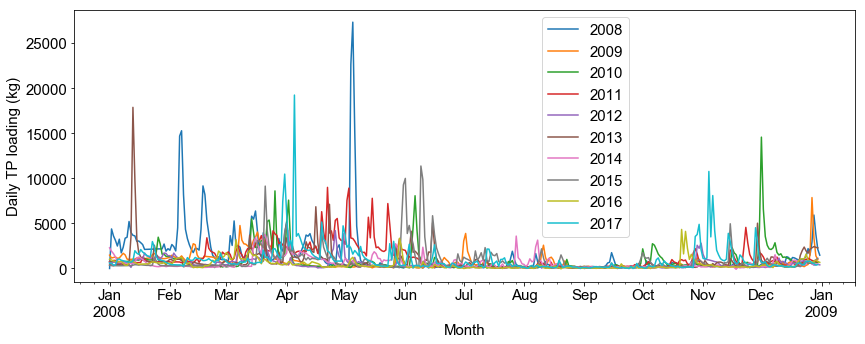

In [6]:
## Absolute TP loading (kg) for each year

load_annual=load.loadkg['2008-1-1':'2008-12-31'].rename("2008").reset_index()

for i in range(2009,2018):
    load_annual = pd.concat([load_annual,load.loadkg[str(i) + '-1-1':str(i) +'-12-31'].\
                         rename(str(i)).reset_index().drop(columns=['date'])],axis=1)
load_annual.index = pd.to_datetime(load_annual['date'], format="%m-%d")
ax = load_annual.drop(columns=['date']).plot(figsize=(14,5))
plt.legend(loc='upper right', bbox_to_anchor=(0.72, 1))
load_annual=load_annual.drop(columns=["date"])

ax.set_ylabel("Daily TP loading (kg)")
ax.set_xlabel("Month")

In [7]:
mean = load_annual.median()

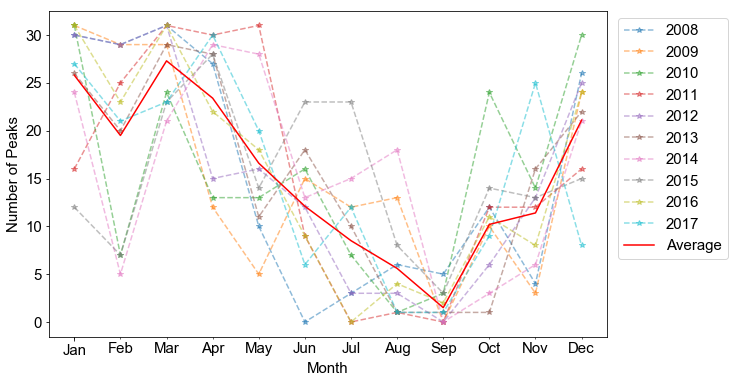

In [8]:
## number of pikes in each month (pike is defined as more than mean)
#plt.figure(figsize=(8,6))
ld_mean = load_annual/mean
ld_mean[ld_mean>1]=1
ld_mean[ld_mean<1]=0
ax = ld_mean.resample("M").sum().plot(figsize=(10,6),style = "*--",alpha=0.5 )
ld_mean.resample("M").sum().mean(1).plot(color = 'r',label = 'Average',linewidth = '1.5')
plt.legend(loc='upper right', bbox_to_anchor=(1.23, 1))

ax.set_ylabel("Number of Peaks")
ax.set_xlabel("Month")
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov'],rotation=0)
plt.savefig("monthly peak number.tif")

Text(0.5,0,'Month')

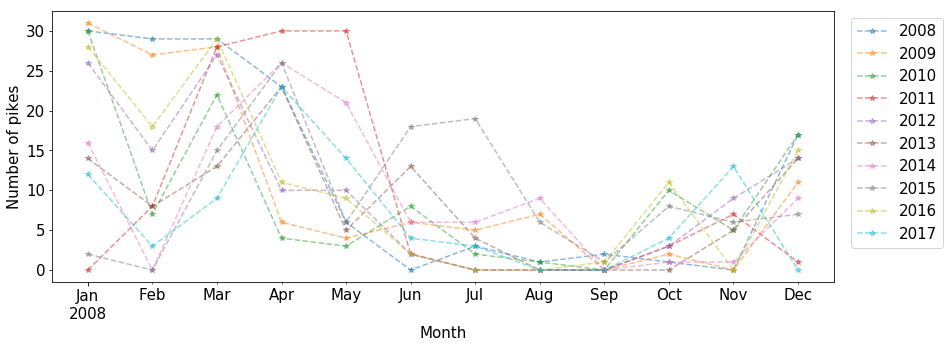

In [9]:
## number of pikes in each month (pike is defined as more than 2*mean)
ld_2mean = load_annual/(2*mean)
ld_2mean[ld_2mean>1]=1
ld_2mean[ld_2mean<1]=0
ax = ld_2mean.resample("M").sum().plot(figsize=(14,5),style = "*--",alpha=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

ax.set_ylabel("Number of pikes")
ax.set_xlabel("Month")

Text(0.5,0,'Month')

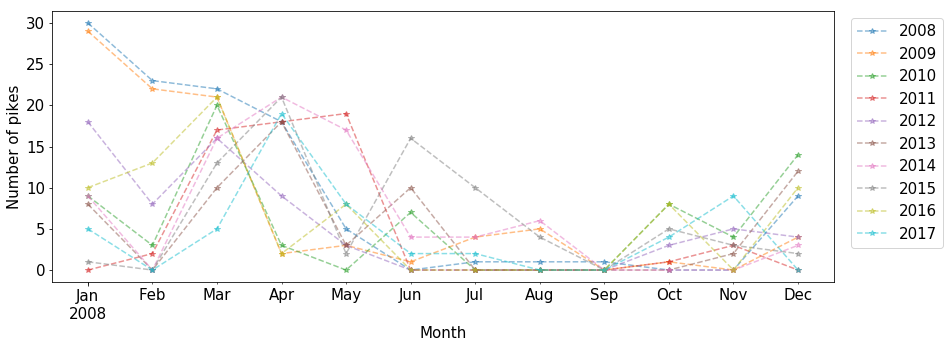

In [10]:
## number of pikes in each month (pike is defined as more than 3*mean)
ld_3mean = load_annual/(3*mean)
ld_3mean[ld_3mean>1]=1
ld_3mean[ld_3mean<1]=0
ax = ld_3mean.resample("M").sum().plot(figsize=(14,5),style = "*--",alpha=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

ax.set_ylabel("Number of pikes")
ax.set_xlabel("Month")

In [9]:
## monthly total loading
load_monthly = load_annual.resample('M').sum()
load_monthly.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
date,,,,,,,,,,
2008-01-31,84132.637331,37943.568178,34825.731017,22277.562776,30358.895879,55538.718353,22273.595767,12015.083325,19772.396021,36071.916337
2008-02-29,113358.076835,36909.005974,12992.771011,33740.729266,19994.882644,17322.379562,6282.809686,9701.922693,20750.412843,23938.490552
2008-03-31,79075.738163,62292.555790,65886.781121,72226.449585,29733.625605,33466.129423,39404.484857,46171.379774,34279.588962,45034.360819
2008-04-30,56862.733028,11880.674306,24507.485156,91401.196976,23907.212895,53861.615674,37079.247769,44363.731873,12246.539214,86560.856496
2008-05-31,80467.126346,11707.632798,11840.614374,101427.396944,14178.576736,14759.070237,29536.025272,25206.167880,17911.752518,38730.432091


In [10]:
load_annual.head()
load_annual.fillna( method ='ffill', inplace = True) 

## load chl-a data from satellite

In [11]:
chl = dict()
for year in [str(i) for i in range(2013,2018)]:
    chl[year] = pd.read_excel("chl_satellite.xlsx",sheet_name = year)
    chl[year].index = pd.to_datetime(chl[year].Date,infer_datetime_format=True)
    chl[year] = chl[year].set_index("Date")


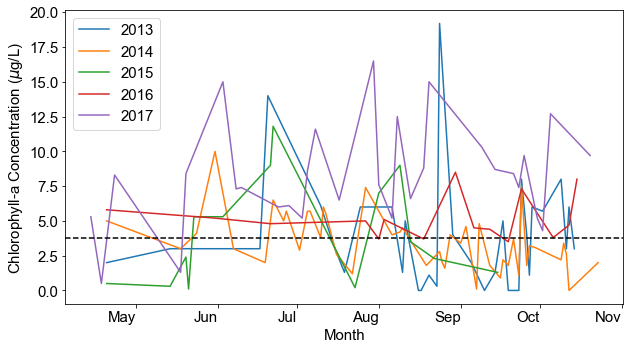

In [12]:
ax = chl['2013'].plot(figsize = (10,6))
ax.set_ylabel("Chlorophyll-a Concentration ("+r'$\mu$'+"g/L)")
for year in [str(i) for i in range(2014,2018)]:
     
    chl[year].plot(ax =ax)
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_xticklabels(['May','Jun','Jul','Aug','Sep','Oct','Nov'],rotation=0)
plt.axhline(linestyle='--', y=3.8, c='black')
plt.xlabel("Month")
plt.savefig('chl 2013 to 2017.tif')

In [13]:
## get monthly aggregation

chl_month_db = pd.DataFrame()
for year in [str(i) for i in range(2013,2018)]:
    chl_monthly = chl[year].resample('M').mean()
    chl_monthly = chl_monthly.set_index(chl_monthly.index.month)
    chl_month_db = pd.concat([chl_month_db,chl_monthly],1)
#chl_month_db = chl_month_db.fillna(method='bfill')
chl_month_db = chl_month_db.fillna(method='ffill')
chl_month_db

,2013,2014,2015,2016,2017
Date,,,,,
4,2.00,5.000000,0.500,5.800,4.700000
5,3.00,5.700000,2.025,5.200,4.850000
6,8.50,4.440000,8.700,4.800,8.360000
7,4.15,4.533333,0.200,5.000,9.680000
8,4.10,3.112500,5.450,5.250,9.283333
9,2.74,2.857143,1.300,4.925,8.283333
10,5.14,2.040000,1.300,5.500,8.900000


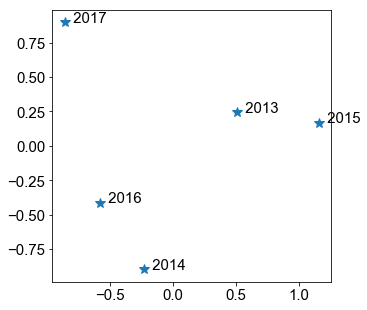

In [14]:
## PCA on chl
pca_chl = PCA(n_components=2)
scaler = MinMaxScaler(feature_range=[0, 1])
chl_rescaled = scaler.fit_transform(chl_month_db.T)
chl_annual_new = pca_chl.fit_transform(chl_rescaled)
plt.figure(figsize=(5,5))
plt.plot(chl_annual_new[:,0],chl_annual_new[:,1],"*",markersize = 10)
for i in range(len(chl_annual_new)):
    plt.text(chl_annual_new[i,0],chl_annual_new[i,1],  '  %d' % (2013 + i))
plt.show()

Text(0,0.5,'cumulative explained variance')

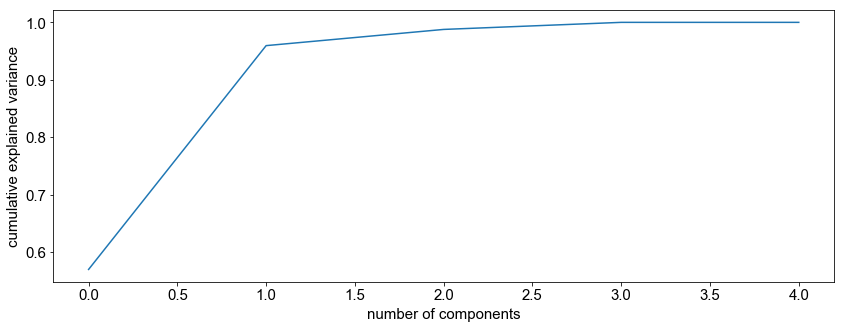

In [15]:
## 2 component reprsent 92%
pca_chl2 = PCA().fit(chl_rescaled)
plt.plot(np.cumsum(pca_chl2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [16]:
chl_annual_new

array([[ 0.51125289,  0.24265539],
       [-0.23172451, -0.89652358],
       [ 1.15789637,  0.16979992],
       [-0.58086337, -0.41270256],
       [-0.85656138,  0.89677083]])

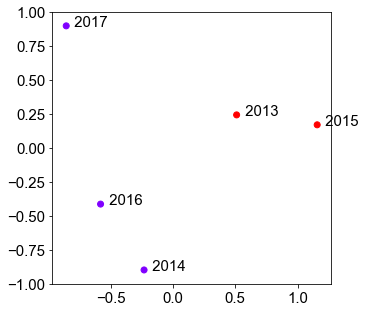

In [17]:
from sklearn.cluster import KMeans
plt.figure(figsize=(5,5))
kmeans = KMeans(n_clusters=2,n_init = 20,max_iter = 100)
kmeans.fit(chl_annual_new)
plt.scatter(chl_annual_new[:,0],chl_annual_new[:,1], c=kmeans.labels_, cmap='rainbow')
for i in range(len(chl_annual_new)):
    plt.text(chl_annual_new[i,0],chl_annual_new[i,1],  '  %d' % (2013 + i))

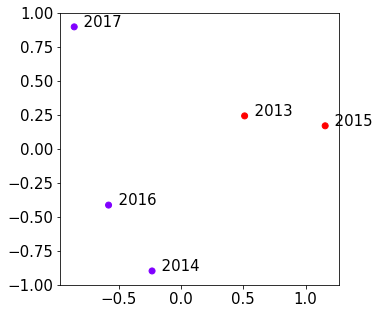

In [18]:
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(5,5))
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(chl_annual_new)
plt.scatter(chl_annual_new[:,0],chl_annual_new[:,1], c=cluster.labels_, cmap='rainbow')
for i in range(len(chl_annual_new)):
    plt.text(chl_annual_new[i,0],chl_annual_new[i,1],  '  %d' % (2013 + i))

In [18]:
## k-mean

chl_train = TimeSeriesScalerMeanVariance().fit_transform(chl_month_db.T.values)
seed = 0
np.random.seed(seed)

In [19]:
km_edu_chl = TimeSeriesKMeans(n_clusters=2, metric="euclidean", max_iter=10,\
...                       random_state=seed, verbose=True)
pred_edu_chl = km_edu_chl.fit_predict(chl_train)

6.377 --> 2.787 --> 2.787 --> 


In [20]:
pred_edu_chl

array([0, 1, 0, 1, 0], dtype=int64)

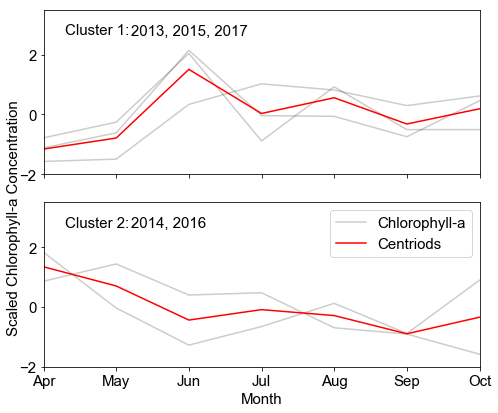

<Figure size 1008x360 with 0 Axes>

In [21]:
plt.figure(figsize=(7,6))
cluster_num = 2
cls_year = ['2013, 2015, 2017','2014, 2016']

for yi in range(cluster_num):
    plt.subplot(2,1, 1+yi)
    n = 0
    for xx in chl_train[pred_edu_chl == yi]:
        if n ==0:
            plt.plot(xx.ravel(), "k-", alpha=.2)
        else:
            plt.plot(xx.ravel(), "k-", alpha=.2, label = 'Chlorophyll-a')
        n+=1
    plt.plot(['Apr','May','Jun','Jul','Aug','Sep','Oct'],km_edu_chl.cluster_centers_[yi].ravel(), "r-", label = 'Centriods')
    
    plt.xlim(0,6)
    plt.ylim(-2,3.5)
    plt.text(0.05, 0.85,'Cluster %d:' % (yi + 1),
             transform=plt.gca().transAxes)
    plt.text(0.2, 0.85,(cls_year[yi]),
             transform=plt.gca().transAxes)
    if yi != 1:
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        #bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
      
#    if yi == 1:
#        plt.title("Eduli $k$-means")
plt.xlabel('Month')
plt.legend(loc = 1)  
#plt.ylabel('Scaled Chlorophyll-a Concentration')
plt.text(-0.5, 3, 'Scaled Chlorophyll-a Concentration', va='center', rotation='vertical')
plt.tight_layout()
plt.show()

plt.savefig('chl clusters.tif')

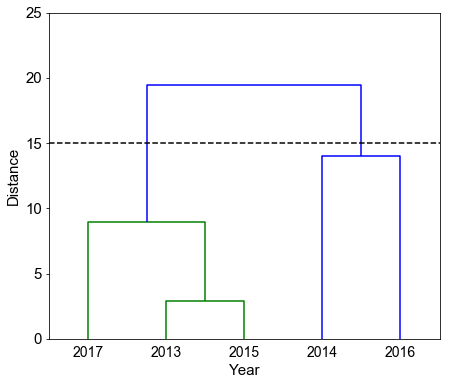

In [22]:
# Do the clustering
matplotlib.rcParams.update({'font.size': 15})
chl_train2 = TimeSeriesScalerMeanVariance().fit_transform(chl_month_db.T.values)
#X_train = X_train.to_frame()
Z_chl = hac.linkage(chl_train2.reshape(5,7), method='average', metric='sqeuclidean')

# Plot dendogram
plt.figure(figsize=(7,6))
#plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Year')
plt.ylabel('Distance')

hac.dendrogram(
    Z_chl,
    #leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14,  # font size for the x axis labels
    labels=chl_month_db.T.index,
    #color_threshold=60000
    
)
plt.axhline(linestyle='--', y=15, c='black') 
plt.ylim(0,25)
plt.savefig("chl dendrogram.tif")

# Find anomaly points in single year

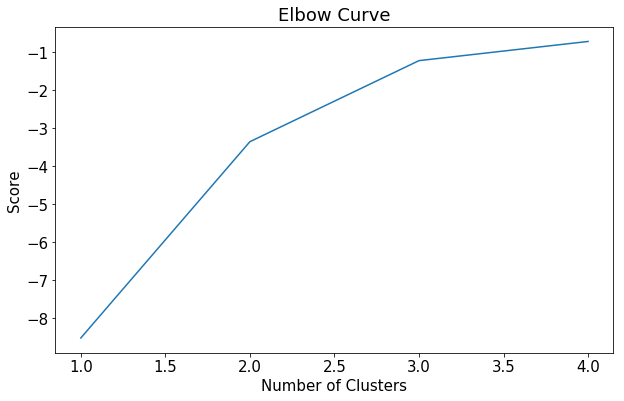

In [26]:
# https://towardsdatascience.com/time-series-of-price-anomaly-detection-13586cd5ff46



load_annual = load_annual.iloc[:-1]
n_cluster = range(1, 5)
data = load_annual["2011"].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(data)
kmeans = [KMeans(n_clusters=i).fit(data_rescaled) for i in n_cluster]
scores = [kmeans[i].score(data_rescaled) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();
## number of clusters: 3

In [27]:
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance



C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


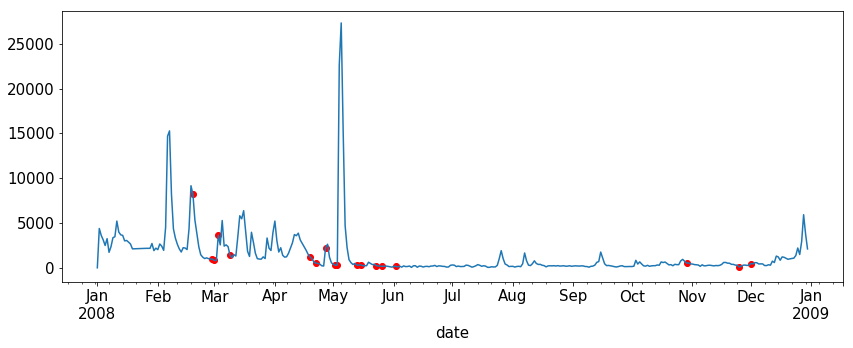

In [28]:
outliers_fraction = 0.05
pca_2008 = pd.DataFrame()
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data_rescaled, kmeans[2])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
pca_2008["abnor"] = (distance >= threshold).astype(int)
load_annual["abnor"] = pca_2008.set_index(load_annual.index)
#load_annual = pd.concat([load_annual,pca_2008],1,ignore_index=True)

load_annual["2008"].plot(figsize=(14,5))
abnor = load_annual[load_annual.abnor == 1]["2008"]
plt.scatter(abnor.index, abnor,c = "red")
#.plot(kind='scatter', marker = "*", color = "red")
#ax.scatter(range(len(pca_2008)), pca_2008['principal_feature1'], c=pca_2008["anomaly1"].apply(lambda x: colors[x]))
#plt.xlabel('principal feature1')
#plt.ylabel('principal feature2')
#plt.legend()

# Find anomaly time series


### Time series decompositions

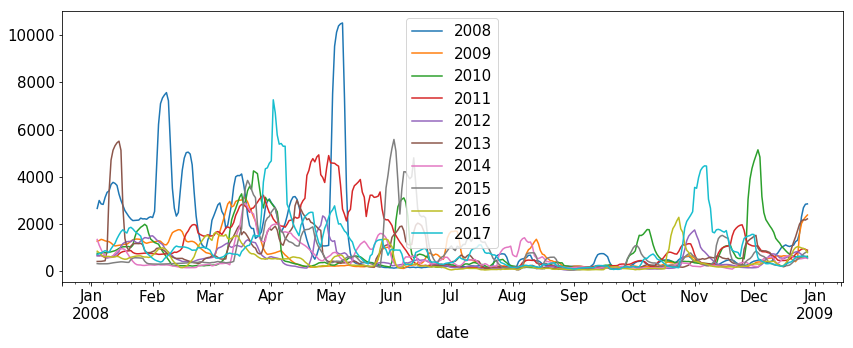

In [183]:
## TP loading trend
## 08, 17, 11 year have more high peaks

plt.figure(figsize=(14,5))
trend = pd.DataFrame()
#diff = load_annual-load_annual.shift(periods=1)
#diff = diff[1:]
for year in [str(i) for i in range(2008,2018)]:
    
    result = seasonal_decompose(load_annual[year])
    trend[year] = result.trend
    result.trend.plot(legend =True)
   #result.seasonal.plot(legend =True)

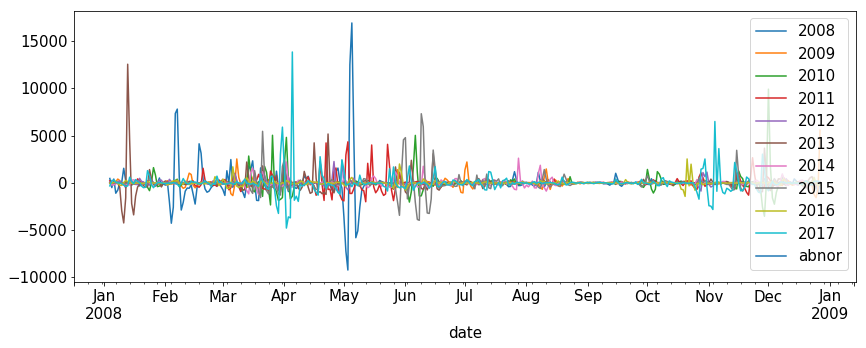

In [40]:
##detrend
(load_annual - trend).plot(legend = True,figsize = (14,5))

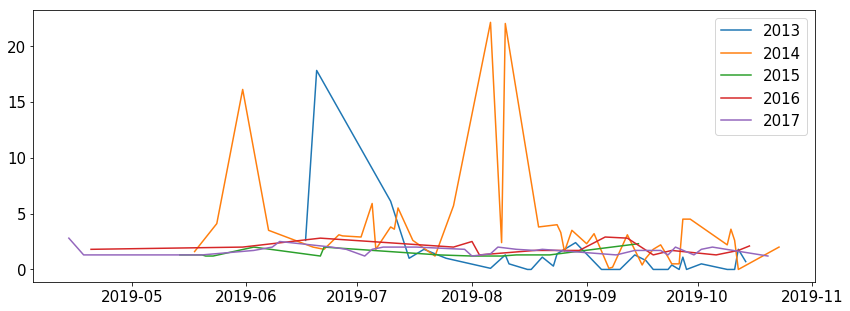

In [41]:
## enbayment chl trend
## 13, 14 year have high peaks

plt.figure(figsize=(14,5))

for year in [str(i) for i in range(2013,2018)]:
    
    result = seasonal_decompose(chl[year],freq=1)
    plt.plot(result.trend,label = year)
    plt.legend()
   #result.seasonal.plot(legend =True)

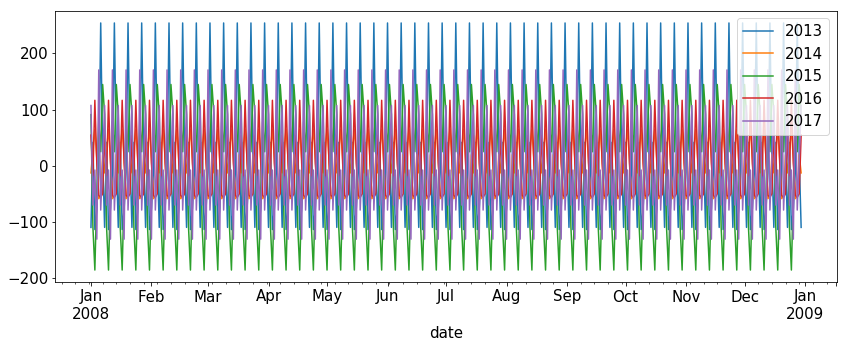

In [42]:
## TP loading season pattern

plt.figure(figsize=(14,5))

for year in [str(i) for i in range(2013,2018)]:
    
    result = seasonal_decompose(load_annual[year])
#    result.trend.plot(legend =True)
    result.seasonal.plot(legend =True)

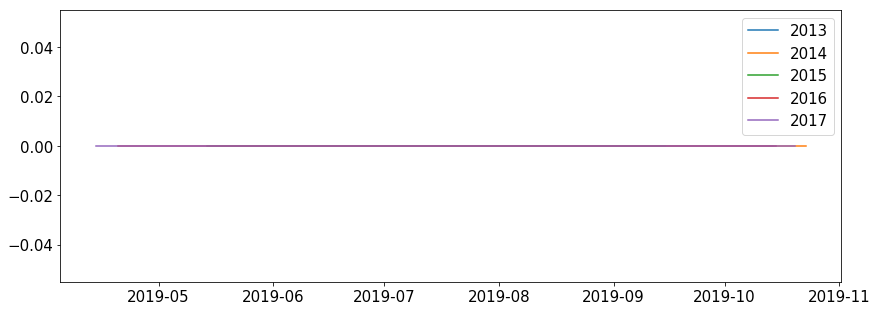

In [43]:
## enbayment chl season pattern


plt.figure(figsize=(14,5))

for year in [str(i) for i in range(2013,2018)]:
    
    result = seasonal_decompose(chl[year],freq=1)
#    plt.plot(result.trend,label = year)
    plt.plot(result.seasonal,label = year)
    plt.legend()


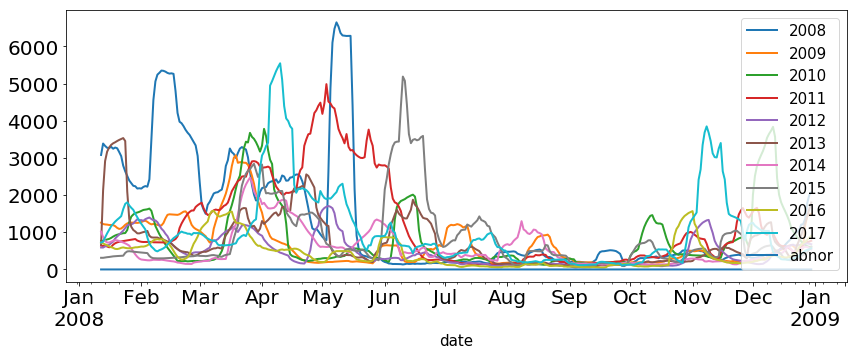

In [44]:
load_annual.rolling(12).mean().plot(figsize=(14,5), linewidth=2, fontsize=20)

### PCA

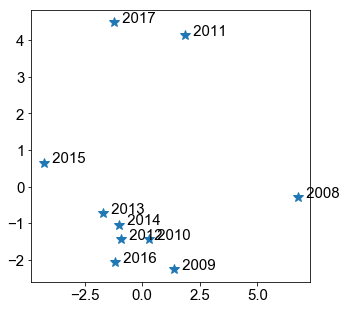

In [23]:

#from mpl_toolkits import mplot3d

#fig = plt.figure()
#ax = plt.axes(projection='3d')


## https://datascience.stackexchange.com/questions/28293/how-to-compare-different-sets-of-time-series-data
pca = PCA(n_components=2)
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(load_annual.T)
load_annual_new = pca.fit_transform(data_rescaled)
plt.figure(figsize=(5,5))
#ax.scatter3D(load_annual_new[:,0], load_annual_new[:,1], load_annual_new[:,2]);
plt.plot(load_annual_new[:,0],load_annual_new[:,1],"*",markersize = 10)
for i in range(len(load_annual_new)):
    plt.text(load_annual_new[i,0],load_annual_new[i,1],'  %d' %(2008 + i))
#plt.show()

    


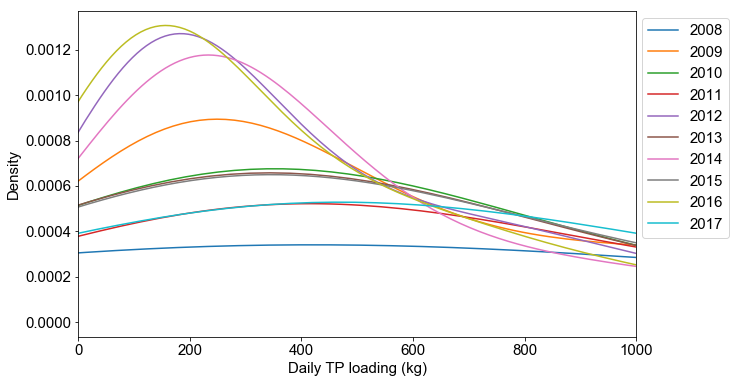

In [26]:
ax = load_annual.plot.density(legend = True,figsize = (10,6))
ax.set_xlim (0,1000)
ax.set_xlabel("Daily TP loading (kg)")
#frame = pd.DataFrame(data=data_rescaled.T, columns = [i for i in range(2008,2018)])
#frame.plot.density(legend =True)
ax.legend(loc='upper right', bbox_to_anchor=(1.18, 1))

plt.savefig("tp density plot.tif")

In [29]:
load_annual.var().sort_values()

2012    2.886031e+05
2016    3.018672e+05
2014    4.486875e+05
2009    7.099621e+05
2013    1.851693e+06
2010    1.853155e+06
2011    1.874454e+06
2015    1.934906e+06
2017    2.585606e+06
2008    6.751780e+06
dtype: float64

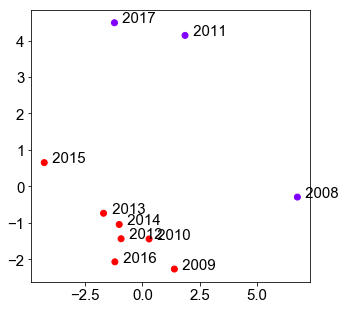

In [30]:
from sklearn.cluster import KMeans
plt.figure(figsize=(5,5))
kmeans = KMeans(n_clusters=2,n_init = 20,max_iter = 100)
kmeans.fit(load_annual_new)
plt.scatter(load_annual_new[:,0],load_annual_new[:,1], c=kmeans.labels_, cmap='rainbow')
for i in range(len(load_annual_new)):
    plt.text(load_annual_new[i,0],load_annual_new[i,1],  '  %d' % (2008 + i))

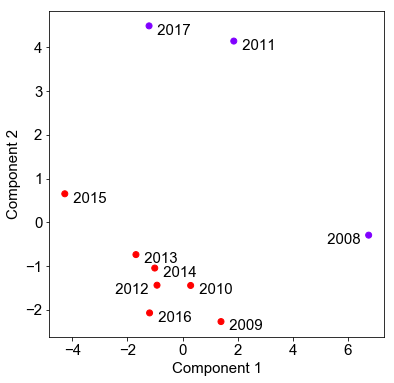

In [489]:
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(6,6))
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(load_annual_new)
plt.scatter(load_annual_new[:,0],load_annual_new[:,1], c=cluster.labels_, cmap='rainbow')
for i in range(len(load_annual_new)):
    if (i == 0)|(i==4):
        plt.text(load_annual_new[i,0]-1.8,load_annual_new[i,1]-0.2,  '  %d' % (2008 + i))
    else:
        plt.text(load_annual_new[i,0],load_annual_new[i,1]-0.2,  '  %d' % (2008 + i))
plt.xlabel("Component 1")
plt.ylabel("Component 2")

plt.savefig('pca tp.tif')

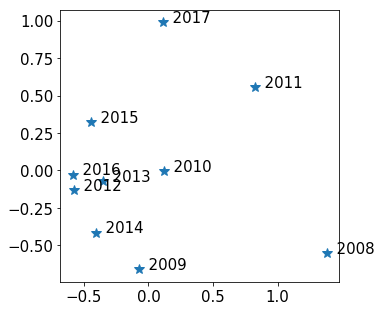

In [259]:

#######monthly loading###########################################
## https://datascience.stackexchange.com/questions/28293/how-to-compare-different-sets-of-time-series-data
pca = PCA(n_components=2)
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(load_monthly.T)
load_monthly_new = pca.fit_transform(data_rescaled)
plt.figure(figsize=(5,5))
plt.plot(load_monthly_new[:,0],load_monthly_new[:,1],"*",markersize = 10)
for i in range(len(load_annual_new)):
    plt.text(load_monthly_new[i,0],load_monthly_new[i,1],  '  %d' % (2008 + i))
plt.show()

    


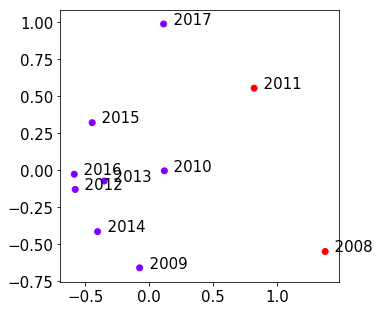

In [260]:
from sklearn.cluster import KMeans
plt.figure(figsize=(5,5))
kmeans = KMeans(n_clusters=2,n_init = 20,max_iter = 100)
kmeans.fit(load_monthly_new)
plt.scatter(load_monthly_new[:,0],load_monthly_new[:,1], c=kmeans.labels_, cmap='rainbow')
for i in range(len(load_monthly_new)):
    plt.text(load_monthly_new[i,0],load_monthly_new[i,1],  '  %d' % (2008 + i))

In [173]:
load_annual_new  ## year of 08,11,17

array([[ 6.74954112, -0.29205775],
       [ 1.39513346, -2.26622009],
       [ 0.29450557, -1.441252  ],
       [ 1.85887148,  4.14144156],
       [-0.92517995, -1.4352243 ],
       [-1.68897474, -0.7361749 ],
       [-1.00708753, -1.0437279 ],
       [-4.26899143,  0.65292545],
       [-1.19441959, -2.06828107],
       [-1.21339839,  4.48857099]])

Text(0,0.5,'cumulative explained variance')

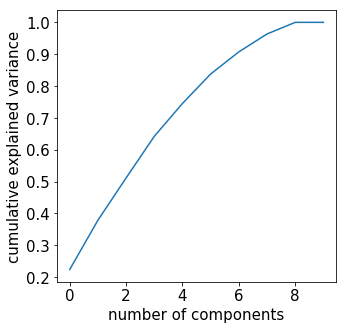

In [29]:
## two components represent 70%
plt.figure(figsize=(5,5))
pca1 = PCA().fit(data_rescaled)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


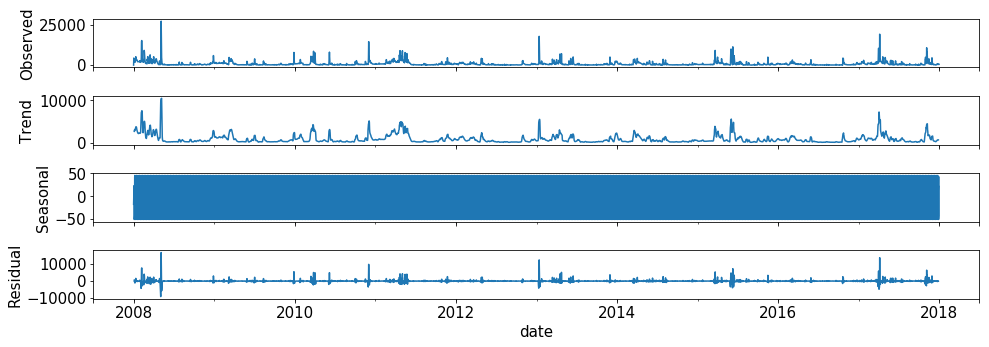

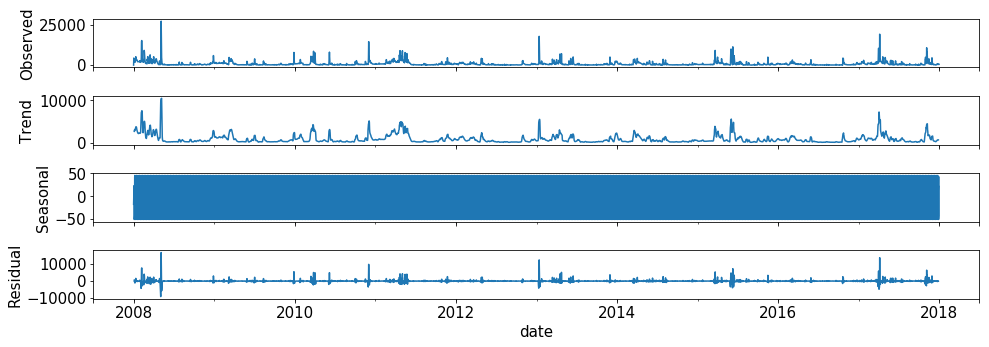

In [26]:

seasonal_decompose(load.loadkg).plot()

In [54]:
from tslearn.generators import random_walks
#X = random_walks(n_ts=50, sz=10, d=1)
X= X.reshape(50,10)
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5,\
                       random_state=0).fit(X)

37.053 --> 25.561 --> 23.628 --> 23.234 --> 23.234 --> 


In [58]:
X[0]

array([-0.92943496, -1.79715737, -1.35088263, -0.08133715, -1.75668079,
       -2.45940536, -1.92808084, -0.66449688,  0.70816853,  1.74811608])

# Cluster multiple time series

https://tslearn.readthedocs.io/en/latest/gen_modules/clustering/tslearn.clustering.TimeSeriesKMeans.html

https://blog.newrelic.com/product-news/optimizing-k-means-clustering/

https://stackoverflow.com/questions/34940808/hierarchical-clustering-of-time-series-in-python-scipy-numpy-pandas

https://datascience.stackexchange.com/questions/29287/multivariate-time-series-clustering

https://www.kaggle.com/egregori/clustering-time-series

In [31]:
##https://tslearn.readthedocs.io/en/latest/auto_examples/plot_kmeans.html#sphx-glr-auto-examples-plot-kmeans-py
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

In [109]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(load_annual.T.values)
#scaler = MinMaxScaler(feature_range=[0, 1])
#X_train = scaler.fit_transform(load_annual.T.values)
seed = 0
np.random.seed(seed)

In [110]:
km_edu = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=10,\
...                       random_state=seed, verbose=True)
pred_edu = km_edu.fit_predict(X_train)

377.598 --> 200.123 --> 200.123 --> 


In [111]:
pred_edu

array([1, 1, 2, 2, 1, 0, 2, 2, 1, 2], dtype=int64)

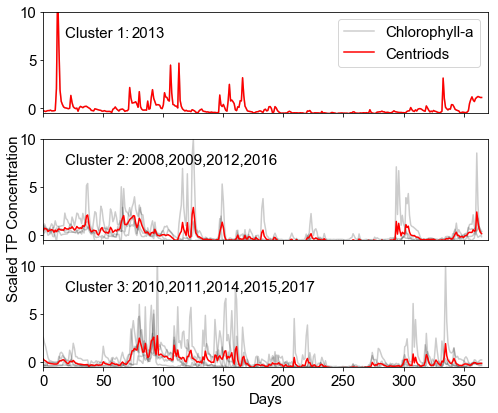

<Figure size 1008x360 with 0 Axes>

In [124]:
plt.figure(figsize=(7,6))
cluster_num = 3
cl_name = ['2013','2008,2009,2012,2016','2010,2011,2014,2015,2017']

for yi in range(cluster_num):
    plt.subplot(3,1, 1+yi)
    n=0
    for xx in X_train[pred_edu == yi]:
        if n==0:
            plt.plot(xx.ravel(), "k-", alpha=.2, label = 'Chlorophyll-a')
        else:
            plt.plot(xx.ravel(), "k-", alpha=.2)
    n+=1
    
    plt.plot(km_edu.cluster_centers_[yi].ravel(), "r-", label = 'Centriods')
    plt.xlim(0, 370)
    plt.ylim(-0.5,10)
    
    plt.text(0.05, 0.75,'Cluster %d:' % (yi + 1),
             transform=plt.gca().transAxes)
    plt.text(0.2, 0.75,(cl_name[yi]),
             transform=plt.gca().transAxes)
    if yi != 2:
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        #bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
        if yi==0:
            plt.legend(loc = 1) 
           
#    if yi == 1:
#        plt.title("Eduli $k$-means")

plt.xlabel("Days")
plt.text(-30, 15, 'Scaled TP Concentration', va='center', rotation='vertical')
plt.tight_layout()
plt.show()
plt.savefig("tp cluster.tif")

In [91]:

km_dtw = TimeSeriesKMeans(n_clusters=3,\
                          n_init=1,\
                          metric="dtw",\
                          verbose=True,\
                          max_iter_barycenter=10,\
                          random_state=seed)
pred_dtw = km_dtw.fit_predict(X_train)
#load_annual

72.004 --> 40.506 --> 40.506 --> 


In [92]:
pred_dtw

array([1, 1, 1, 1, 1, 0, 2, 1, 1, 2], dtype=int64)

In [93]:
km_sdtw = TimeSeriesKMeans(n_clusters=3,\
                           metric="softdtw",\
                           metric_params={"gamma": .1},\
                           verbose=True,\
                           random_state=seed)
pred_sdtw = km_sdtw.fit_predict(X_train)
#load_annual

177209.041 --> 228449.331 --> 228486.439 --> 228551.125 --> 228558.352 --> 228574.025 --> 228576.629 --> 228587.797 --> 228588.963 --> 228597.498 --> 228598.443 --> 228604.804 --> 228604.708 --> 228609.557 --> 228609.416 --> 228613.219 --> 228613.120 --> 228616.225 --> 228616.310 --> 228619.015 --> 228619.597 --> 228622.345 --> 228625.013 --> 228632.081 --> 228687.258 --> 228898.220 --> 228924.450 --> 228930.897 --> 228932.427 --> 228933.879 --> 228933.243 --> 228934.480 --> 228933.766 --> 228934.912 --> 228934.208 --> 228935.285 --> 228934.609 --> 228935.624 --> 228934.961 --> 228935.931 --> 228935.288 --> 228936.216 --> 228935.589 --> 228936.485 --> 228935.874 --> 228936.742 --> 228936.142 --> 228936.989 --> 228936.394 --> 228937.228 --> 


In [94]:
pred_sdtw

array([0, 1, 1, 1, 1, 0, 2, 2, 1, 1], dtype=int64)

### try hierarchical clustering

In [228]:
load_monthly.T

date,2008-01-31 00:00:00,2008-02-29 00:00:00,2008-03-31 00:00:00,2008-04-30 00:00:00,2008-05-31 00:00:00,2008-06-30 00:00:00,2008-07-31 00:00:00,2008-08-31 00:00:00,2008-09-30 00:00:00,2008-10-31 00:00:00,2008-11-30 00:00:00,2008-12-31 00:00:00
2008,84132.637331,113358.076835,79075.738163,56862.733028,80467.126346,4824.084554,9478.032170,9951.320875,9152.436552,13123.785729,9554.075132,37996.223177
2009,37943.568178,36909.005974,62292.555790,11880.674306,11707.632798,11991.487824,17824.275117,15685.019199,5429.839432,10169.549783,7201.000937,28621.239204
2010,34825.731017,12992.771011,65886.781121,24507.485156,11840.614374,30489.970799,9353.152103,6189.287353,5395.189391,25359.634064,20560.933520,56916.683164
2011,22277.562776,33740.729266,72226.449585,91401.196976,101427.396944,17091.285468,4616.063658,8088.471826,6190.319881,19875.275571,28254.129894,22982.812337
2012,30358.895879,19994.882644,29733.625605,23907.212895,14178.576736,9494.935109,4406.299955,3742.246694,3563.057624,11750.822814,12977.589510,17050.682613
2013,55538.718353,17322.379562,33466.129423,53861.615674,14759.070237,32958.112461,10367.942245,4113.520201,3525.992167,6382.885812,20025.349876,33846.716506
2014,22273.595767,6282.809686,39404.484857,37079.247769,29536.025272,13014.575209,14312.663795,18085.710369,4671.576690,6019.641241,6593.372528,15085.616970
2015,12015.083325,9701.922693,46171.379774,44363.731873,25206.167880,75504.565943,27181.420589,11058.815567,4789.314700,15769.637203,18630.171409,15965.471967
2016,19772.396021,20750.412843,34279.588962,12246.539214,17911.752518,5959.768012,2446.777212,3286.746591,2842.119374,20352.347459,6717.054694,17274.302002
2017,36071.916337,23938.490552,45034.360819,86560.856496,38730.432091,17272.851927,19326.143920,6469.605978,4623.199119,23143.951367,62084.664574,13185.488433


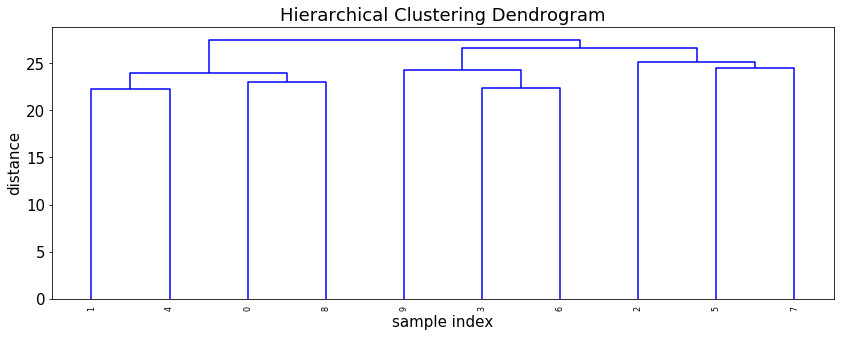

In [225]:
# Do the clustering
matplotlib.rcParams.update({'font.size': 15})
X_train = TimeSeriesScalerMeanVariance().fit_transform(load_annual.T.values)
data_rescaled = scaler.fit_transform(load_annual.T)
#X_train = X_train.to_frame()
Z = hac.linkage(X_train.reshape(10,366), method='complete', metric='Euclidean')

# Plot dendogram
plt.figure(figsize=(14,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

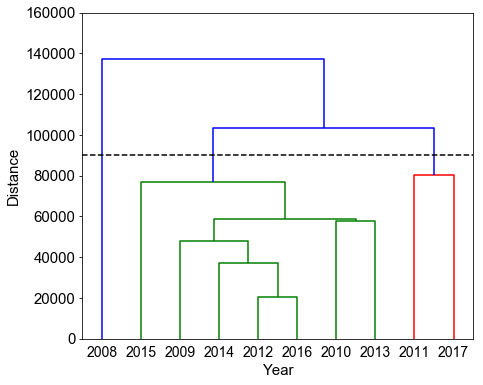

In [37]:
# Do the clustering

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(load_monthly.T)
X_train = TimeSeriesScalerMeanVariance().fit_transform(load_monthly.T.values)
#X_train = X_train.to_frame()
Z = hac.linkage(load_monthly.T, method='average', metric='euclidean')

# Plot dendogram
plt.figure(figsize=(7,6))
#plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Year')
plt.ylabel('Distance')
hac.dendrogram(
    Z,
    #leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14,  # font size for the x axis labels
    labels=load_monthly.T.index,
    #color_threshold=60000
)
plt.axhline(linestyle='--', y=90000, c='black') 
plt.ylim(0,160000)
plt.savefig('tp dendrogram.tif')
plt.show()



In [105]:


def print_clusters(timeSeries, Z, k, plot=False):
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion='maxclust')

    # check the results
    s = pd.Series(results)
    clusters = s.unique()

    for c in clusters:
        cluster_indeces = s[s==c].index
        print("Cluster %d number of entries %d" % (c, len(cluster_indeces)))
        if plot:
            timeSeries.T.iloc[:,cluster_indeces].plot()
            plt.show()

print_clusters(timeSeries, Z, 3, plot=False)

NameError: name 'timeSeries' is not defined

In [38]:
variance = load_annual.var()/(10**6)
annual_total = load_annual.resample('Y').sum().T/1000
annual_total = annual_total.rename(columns = {annual_total.columns[0]:'Annual TP (MT)'})
eutro = pd.Series([50,50,200,200,50,200,50,200,50,200], index = [str(i) for i in range(2008,2018)],name = 'Eutrophication level') ## 1 no eutrophication; 2 with eutrophication
clas = pd.Series(['blue','blue','red','red','blue','green','blue','red','blue','red'], index = [str(i) for i in range(2008,2018)], name = 'Cluster')
df_cre = pd.concat([variance.rename('Variance (10^6)'),annual_total,eutro, clas],1)
df_cre

,Variance (10^6),Annual TP (MT),Eutrophication level,Cluster
2008,6.751780,507.976270,50,blue
2009,0.709962,257.655849,50,blue
2010,1.853155,304.318233,200,red
2011,1.874454,428.171694,200,red
2012,0.288603,181.158828,50,blue
2013,1.851693,286.168433,200,green
2014,0.448688,212.359320,50,blue
2015,1.934906,306.357683,200,red
2016,0.301867,163.839805,50,blue
2017,2.585606,376.441962,200,red


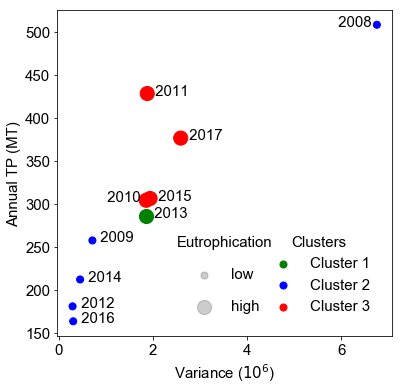

In [39]:
fig, ax = plt.subplots()
for i, color in enumerate(['green','blue','red']):
    df_sub = df_cre[df_cre.Cluster ==color]
    df_sub.plot(kind = 'scatter',x='Variance (10^6)',y='Annual TP (MT)',c=color,s = df_sub['Eutrophication level'],\
                          figsize=(6,6),\
                          legend = True,ax = ax, label = 'Cluster %d' % (i+1))
for i in range(len(df_cre)):
    if (i==2)|(i==0):
        ax.text(df_cre['Variance (10^6)'].values[i]-1,df_cre['Annual TP (MT)'].values[i]-1.5,  '  %d' % (2008 + i))
    else:
        ax.text(df_cre['Variance (10^6)'].values[i],df_cre['Annual TP (MT)'].values[i]-1.5,  '  %d' % (2008 + i))

# Legend for color cluster
lgd = ax.legend(numpoints=3, loc=0, borderpad=1, 
            frameon=True, framealpha=0, title="Clusters")
for handle in lgd.legendHandles:
    handle.set_sizes([50.0])
  
# Make a legend for eutrophcation
for size,pw in zip([50,200],['low','high']):
    plt.scatter([], [], s=size, c="k",label=pw, alpha = '0.2')

h, l = plt.gca().get_legend_handles_labels()
plt.legend(h[-2:], l[-2:], labelspacing=1.2, title="Eutrophication", borderpad=1, 
            frameon=True, framealpha=0, loc=8, numpoints=1)
plt.gca().add_artist(lgd)  
plt.xlabel('Variance ('+r'$10^6$)')
plt.savefig('4d cretiaria.tif')

## determine the scenarios

### Two scenarios:
1. real conditions in 2013 and real loading in 2013
2. real conditions in 2013 and pattern of 2016. The loading during the simulated six months are the same as 2013.

In [178]:
average_discharge = load.Discharge.loc['2013-04-01':'2013-10-01'].mean()

In [40]:
anuual_sixmonth = load_annual.loc['2008-04-01':'2008-10-01']

In [41]:
sixmonth_ratio = anuual_sixmonth/anuual_sixmonth.sum()

Text(0,0.5,'Percent')

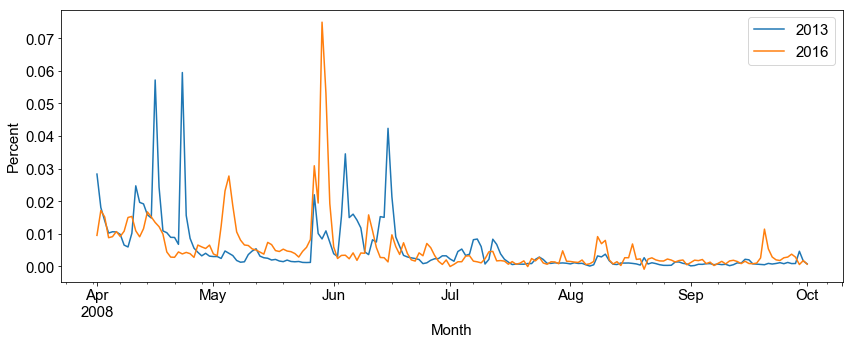

In [42]:
sixmonth_ratio['2013'].plot(legend = True)
sixmonth_ratio['2016'].plot(legend = True)
plt.xlabel('Month')
plt.ylabel('Percent')

Text(0,0.5,'Daily TP loading (kg)')

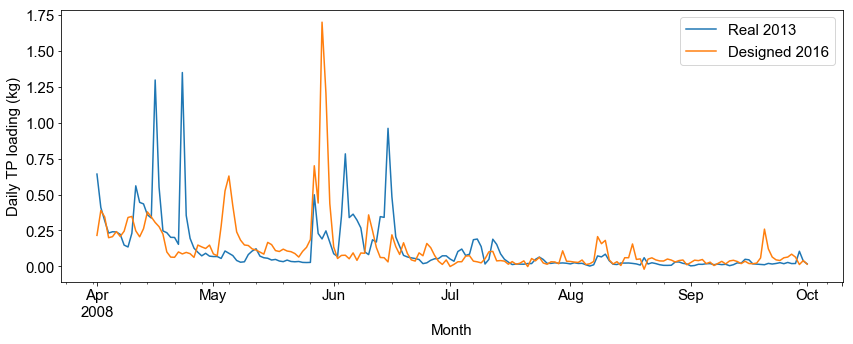

In [179]:
## get desgined 2016 (scenario b)

real_2013 = (sixmonth_ratio['2013']*anuual_sixmonth.sum().loc['2013'])/(24*3.6*average_discharge)

real_2013.plot(legend = True,label = 'Real 2013')
designed_2016 = (sixmonth_ratio['2016']*anuual_sixmonth.sum().loc['2013'])/(24*3.6*average_discharge)
designed_2016.plot(legend = True, label = 'Designed 2016')
#anuual_sixmonth['2013'].plot(legend = True)
plt.xlabel('Month')
plt.ylabel('Daily TP loading (kg)')

In [183]:
real_2013.to_csv('real_2013_averageQ.csv')
designed_2016.to_csv('designed_2016.csv')

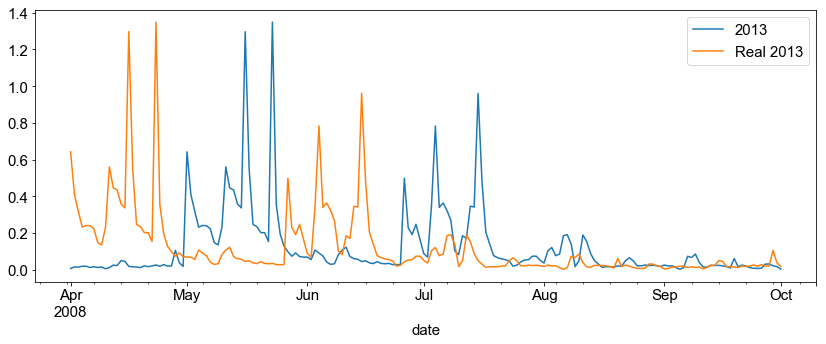

In [185]:
## move one month tail of 2013 to head (scenario c)
one_tail = pd.concat([anuual_sixmonth['2013'].iloc[-30:],anuual_sixmonth['2013'].iloc[:-30]],0)
one_tail = one_tail.to_frame()
one_tail = one_tail.set_index(pd.date_range(start='4/1/2008', end='10/1/2008', freq='D'))/(24*3.6*average_discharge)
one_tail.plot(label = 'One month to head',legend = True)
(anuual_sixmonth['2013']/(24*3.6*average_discharge)).plot(label = 'Real 2013',legend = True)

In [186]:
one_tail.to_csv('one_month_head_2013.csv')

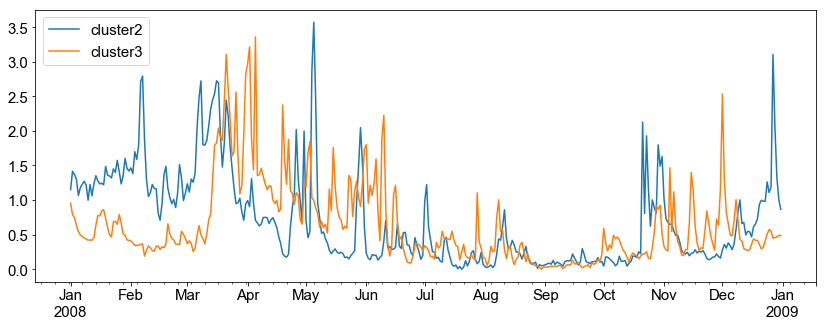

In [139]:
##d.Centroid of cluster 2. But total mass is the same as 2013 Apr. to Sep. (scenario d)

clusters = pd.Series(km_edu.cluster_centers_[1].ravel(), \
                     index = pd.date_range(start='1/1/2008', end='12/31/2008', freq='D'),name = 'cluster2')
#clusters = clusters.to_frame()
clusters  = pd.concat([clusters, pd.Series(km_edu.cluster_centers_[2].ravel(), \
                     index = pd.date_range(start='1/1/2008', end='12/31/2008', freq='D'),name = 'cluster3')],1)
(clusters - clusters.min()).plot()

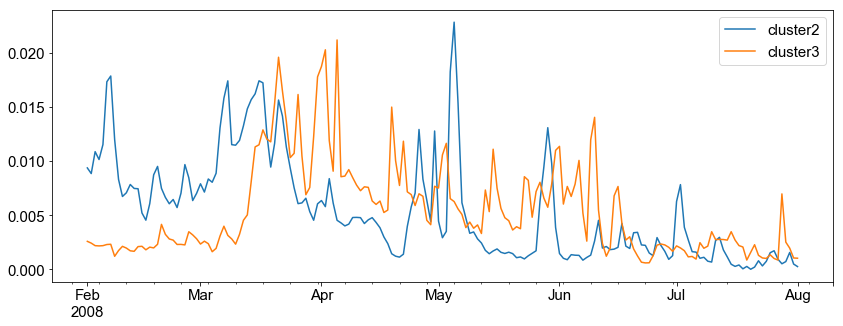

In [142]:
clusters = (clusters - clusters.min())
clusters_sixmonth = clusters.loc['2008-02-01':'2008-08-01']
clusters_sixmonth = clusters_sixmonth/clusters_sixmonth.sum()
clusters_sixmonth.plot()

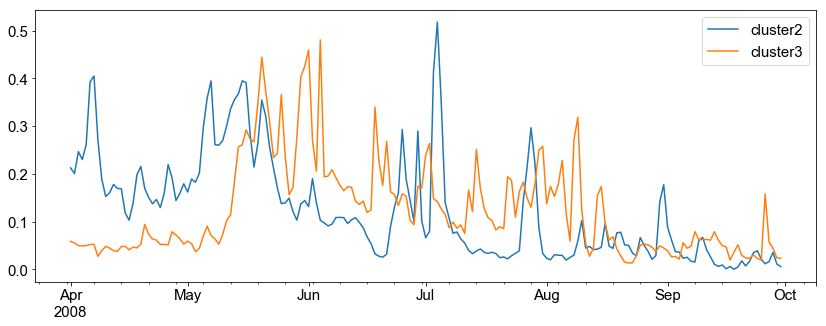

In [187]:
final_clusters  = clusters_sixmonth*anuual_sixmonth.sum().loc['2013']
final_clusters = final_clusters.set_index(pd.date_range(start='4/1/2008', end='9/30/2008', freq='D'))/(24*3.6*average_discharge)
final_clusters.plot()

In [188]:
final_clusters.to_csv('cluster2and3.csv')